In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

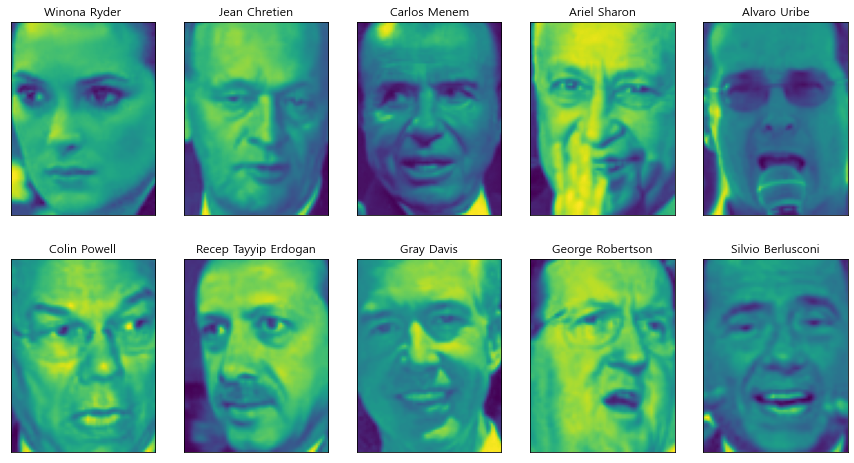

In [4]:
fig, axes = plt.subplots(2,5, figsize=(15,8),
                        subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
print('people.image.shape : ', people.images.shape)
print('클래스 개수 : ', len(people.target_names))

people.image.shape :  (3023, 87, 65)
클래스 개수 :  62


In [6]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1

x_people = people.data[mask]
y_people = people.target[mask]

#흑백 이미지는 0에서 255까지의 픽셀값을 가짐
#스케일 조정 0~1 사이
x_people = x_people / 255

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_people,
                                                   y_people, stratify=y_people,
                                                   random_state=0)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.score(x_test, y_test)

0.2189922480620155

In [22]:
pca = PCA(n_components=50, whiten=True, random_state=0)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape

(1547, 50)

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)
knn.score(x_test_pca, y_test)

0.26356589147286824

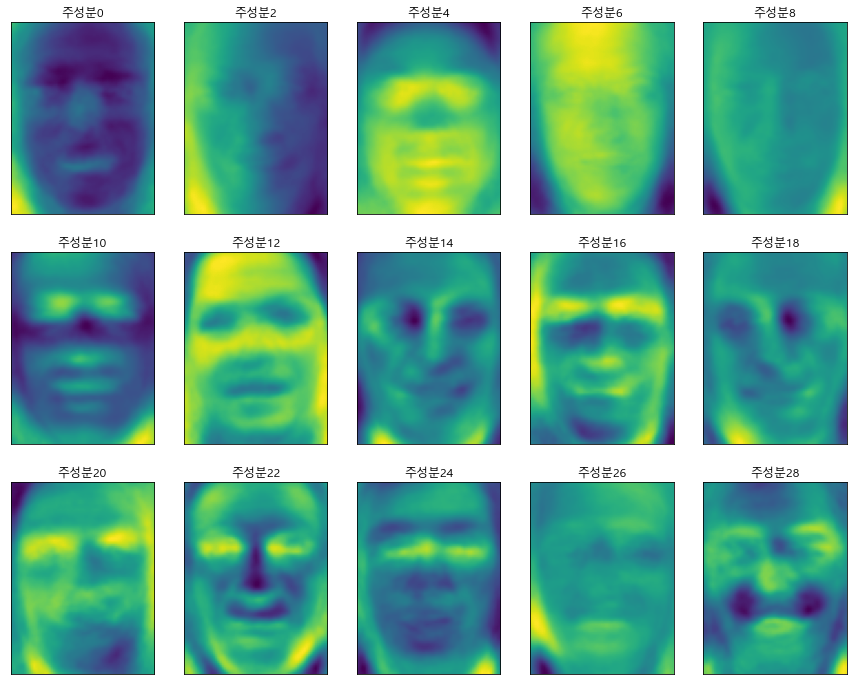

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks' : (),
                                     'yticks' : ()})
for i, (componenet, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(componenet.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분{}'.format((i+i)))